# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [1]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from scipy.spatial.distance import cdist
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer

     |████████████████████████████████| 79 kB 4.8 MB/s 
     |████████████████████████████████| 3.5 MB 14.4 MB/s 
     |████████████████████████████████| 1.2 MB 50.7 MB/s 
     |████████████████████████████████| 67 kB 7.4 MB/s 
     |████████████████████████████████| 895 kB 53.2 MB/s 
     |████████████████████████████████| 6.8 MB 45.8 MB/s 
     |████████████████████████████████| 596 kB 58.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=4a41781def51621c705cae798b292a0c87716f23609ba77f028359c9a5088b2d
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [3]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [4]:
print(set(newsgroups_train.target))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [5]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [7]:
def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding

In [8]:
X = []
Y = []
for (article,label) in zip(newsgroups_train.data,newsgroups_train.target):
  X.append(get_review_embedding(article))
  Y.append(label)

In [9]:
X = np.array(X)
Y = np.array(Y)
type(X),type(Y)

(numpy.ndarray, numpy.ndarray)

In [10]:
X.shape,Y.shape

((11314, 768), (11314,))

In [11]:
a_file = open("test.txt", "w")
for row in X:
    np.savetxt(a_file, row)
a_file.close()

In [ ]:
#original_array = np.loadtxt("test.txt").reshape(11314, 768)

In [13]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)

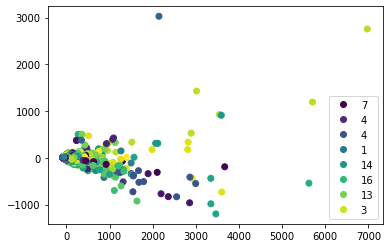

In [14]:
plot = plt.scatter(X_reduced[:,0], X_reduced[:,1], c=Y)
plt.legend(handles=plot.legend_elements()[0], labels=list(newsgroups_train.target))
plt.show()

# K_Means Algorithm


In [15]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=4).fit(X_reduced)
label = kmeans.fit_predict(X_reduced)
print(label)

[0 0 0 ... 0 0 0]


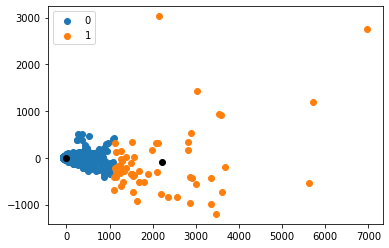

In [16]:
#code for visualisation of clusters
#Getting unique labels
centroids = kmeans.cluster_centers_
unigue_labels = np.unique(label)
#plotting the results:
for i in unigue_labels:
    plt.scatter(X_reduced[label == i , 0] , X_reduced[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1],c="black")
plt.legend()
plt.show()

# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







In [23]:
X.shape

(11314, 768)

In [39]:
def elbow_method(k_max):
  distortions = []
  inertias = []
  labels = {}
  for k in range(1,k_max+1):
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min( cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1 )) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    labels[k] = kmeanModel.labels_
  return inertias, distortions,labels

In [59]:
inertias, distortions,labels = elbow_method(20)

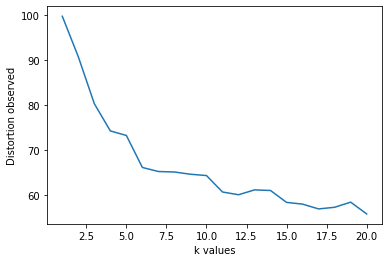

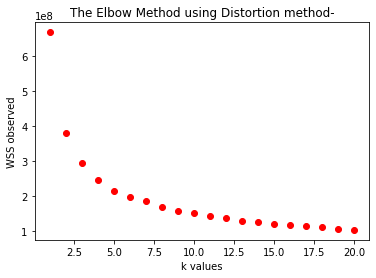

In [61]:
plt.plot([i+1 for i in range(20)], distortions)
plt.xlabel('k values')
plt.ylabel('Distortion observed')
plt.show()
plt.plot([i+1 for i in range(20)], inertias,'ro')
plt.xlabel('k values')
plt.ylabel('WSS observed')
plt.title('The Elbow Method using Distortion method-')
plt.show()

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




In [62]:
from sklearn.metrics import silhouette_score

In [63]:
def silhouette_score_fun(k,labels):
  scores = []
  for i in range(2,k+1):
    #print('i:',i)
    scores.append(silhouette_score(X,labels[i],metric = 'euclidean'))
  return scores

In [ ]:
scores = silhouette_score_fun(20,labels)

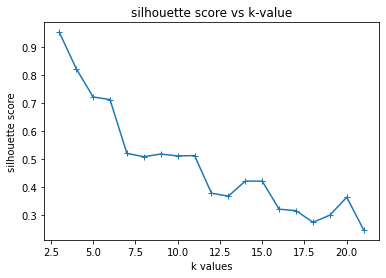

In [69]:
plt.plot([i+1 for i in range(2,21)], scores,marker = '+')
plt.xlabel('k values')
plt.ylabel('silhouette score')
plt.title('silhouette score vs k-value')
plt.show()

In [81]:
scores

[0.9514840138409209,
 0.821766432097932,
 0.720569201851427,
 0.7109341773304327,
 0.5189971743889933,
 0.5074553424268442,
 0.5168592579482788,
 0.5101726628954492,
 0.5113933966706954,
 0.3769380594101266,
 0.3666175525674813,
 0.42021814285358566,
 0.4202761357917877,
 0.32011210225792586,
 0.31480574956855084,
 0.2734447381234924,
 0.2985108842733934,
 0.36283934065178186,
 0.24608473198888522]



*    > In Elbow Method we can observe, the major drop or change is happening from k = 1 to k=2, But we can't see the elbow clearly from the distortion grapg or wss graph
*   >   In silhouette score method, we can see first maximum at k = 2, Optimal Clusters is at Global Maximum of silhouette score
*   >  So on a conclusion we can say Optimal clusters are 2 to perform.



# Agglomerative clustering

In [ ]:
import pandas as pd

In [130]:
from sklearn.cluster import AgglomerativeClustering

def AgglomerativeClustering_fun(X_reduced):
  clustering = AgglomerativeClustering().fit(X_reduced)
  labels=clustering.labels_
  return clustering, labels


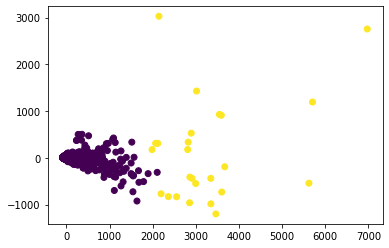

In [131]:
AggloClust,labels = AgglomerativeClustering_fun(X_reduced)
plt.scatter(X_reduced[:,0] , X_reduced[:,1],c=labels)
plt.show()

# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



```
Agglomerative Clustering
```
*      >Also known as hierarchical agglomerative clustering or bottom-up technique (HAC). Flat clustering returns an unstructured set of clusters; this structure is more revealing. We don't have to define the number of clusters in advance with this clustering procedure. Bottom-up algorithms start by treating each piece of data as a singleton cluster, then agglomerate pairs of clusters until all of them are merged into a single cluster that contains all of the data.

```
Divisive Clustering
```
*     >Also a Hierarchical Clustering, A top-down approach. This algorithm also eliminates the need to specify the number of clusters ahead of time. Top-down clustering requires a mechanism for splitting a cluster that comprises the full data and progresses by splitting clusters recursively until each data have been divided into singleton clusters..

*     >A divisive algorithm is also more precise. Without first examining the global distribution of data, agglomerative clustering makes judgments based on local patterns or neighbour points. These early decisions are irreversible. When making top-level dividing decisions, divisive clustering considers the global distribution of data.

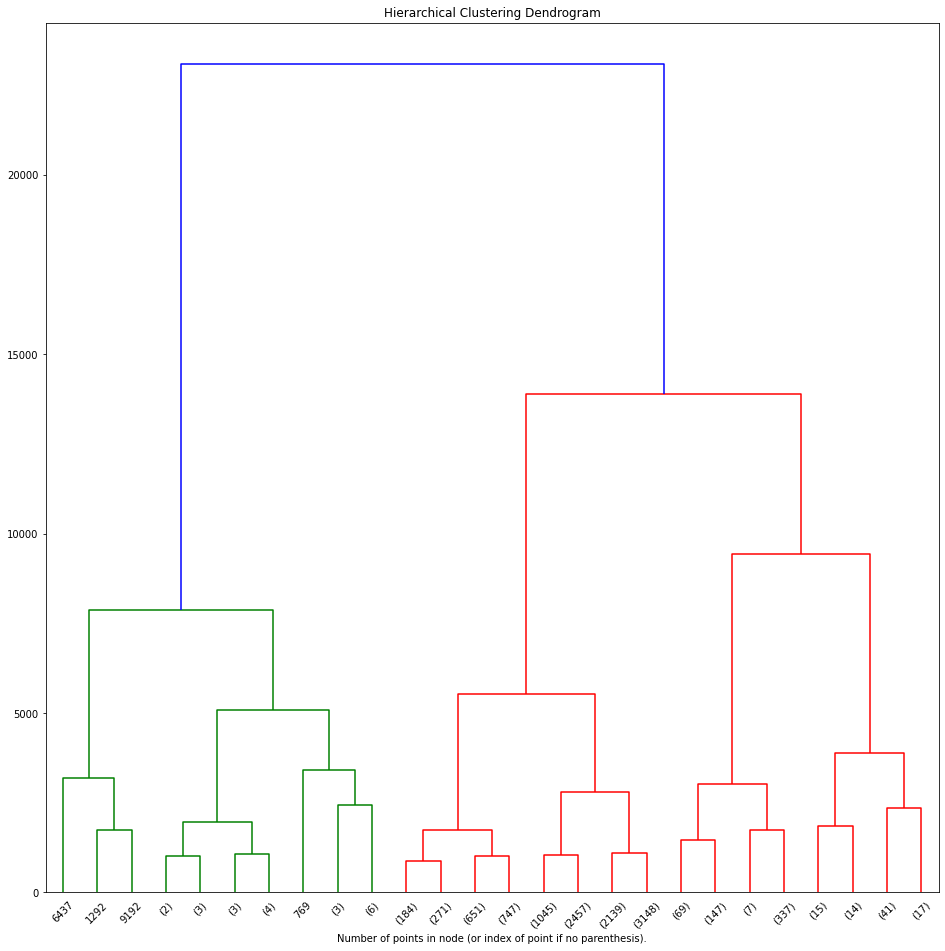

In [132]:
# code to write dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16,16))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
Dendogram = shc.dendrogram(shc.linkage(X_reduced, method ='ward'),p=4,truncate_mode="level")

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


